# Network evolution

This notebook shows some network properties, and what are the mechanisms for network generation, that create networks similar to real-world networks, in terms of this properties.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
import pandas as pd

# Degree distribution

First network property is a distribution of its node degree. Below, we find a drawing of Karate Club graph. It is a very small network, but still we can observe some interesting properties: the diamater is small (shortest paths are short), average clustering is pretty high. There are some nodes with high degree, but most of the nodes have very low degree.

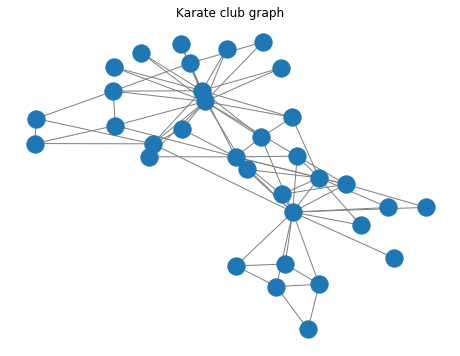

In [2]:
G = nx.karate_club_graph()

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, width=2)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Karate club graph')
plt.axis('off');

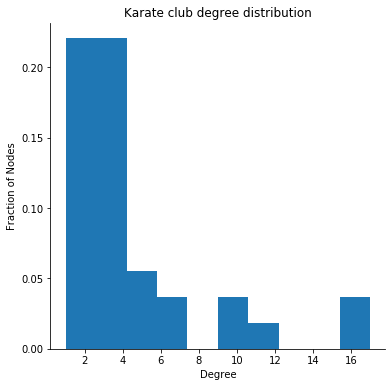

In [3]:
figure = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degrees = G.degree()
plt.hist(dict(degrees).values(), density=True);
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Karate club degree distribution')
plt.show();

In [4]:
nx.average_clustering(G)

0.5706384782076823

In [5]:
nx.average_shortest_path_length(G)

2.408199643493761

In case of directed networks, we can draw its in- and out-degree distribution

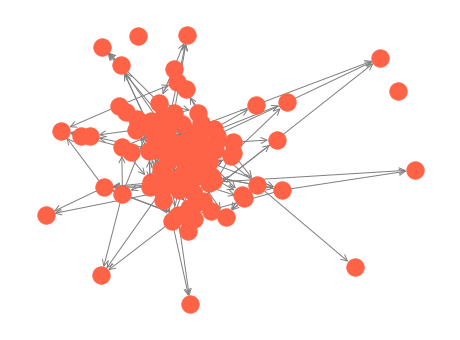

In [6]:
DG = nx.fast_gnp_random_graph(100, 0.02, directed=True)

pos = nx.layout.spring_layout(DG)
plt.figure(figsize=(8, 6))
nodes = nx.draw_networkx_nodes(DG, pos, node_color='tomato')
edges = nx.draw_networkx_edges(DG, pos, edge_color='grey', arrowstyle='->', arrowsize=15)
plt.axis('off');

In-degree distribution of the network

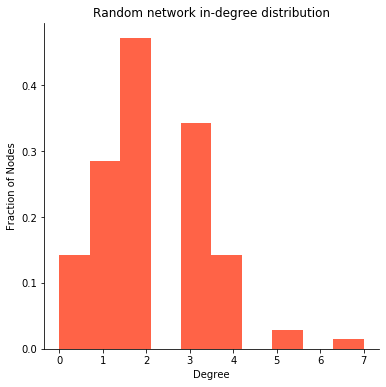

In [7]:
figure = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degrees = DG.in_degree()
plt.hist(dict(degrees).values(), density=True, color='tomato');
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Random network in-degree distribution')
plt.show();

Out-degree of the network

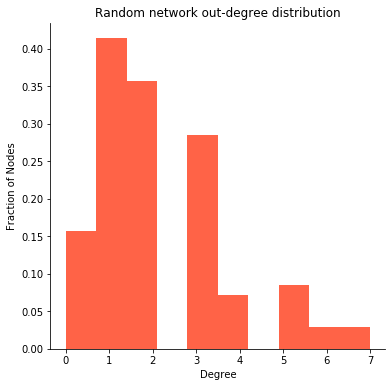

In [8]:
figure = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degrees = DG.out_degree()
plt.hist(dict(degrees).values(), density=True, color='tomato');
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Random network out-degree distribution')
plt.show();

In [9]:
nx.average_clustering(DG.to_undirected())

0.03741269841269842

We can see that in case of a random network, degree distribution is very different from the one we've observed in a real network. Its average clustering is very low. 

It would be interesting to learn about mechanisms for network generation, that have mathematical properties similar to real-world networks.

# Preferential attachment

First mechanism for network generation is preferential attachment. It assigns new connection to node, that already have a high degree. This procedure results in networks in which most of the nodes have a low degree, but there are some nodes which high or very high degree - it is able to create networks with power law degree distribution, present in many phenomena. An example of such phenomena is frequency of word's apperance in a given language.

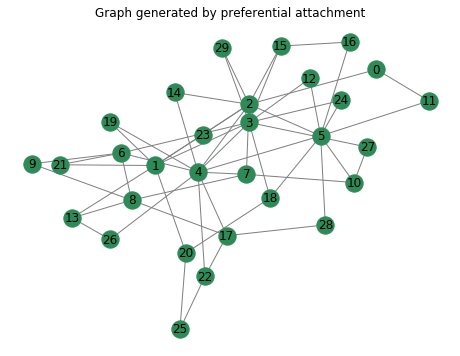

In [10]:
G_generated = nx.barabasi_albert_graph(30, 2)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_generated)
nx.draw_networkx_nodes(G_generated, pos, width=2, node_color='seagreen')
nx.draw_networkx_edges(G_generated, pos, edge_color='grey')
nx.draw_networkx_labels(G_generated, pos)
plt.title('Graph generated by preferential attachment')
plt.axis('off');

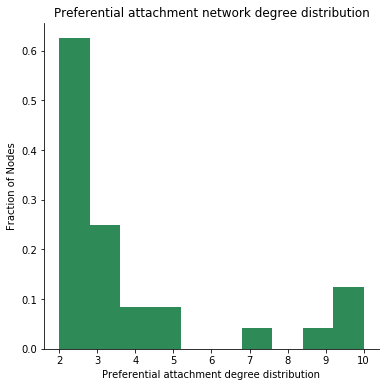

In [11]:
figure = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degrees = G_generated.degree()
plt.hist(dict(degrees).values(), density=True, color='seagreen');
plt.xlabel('Preferential attachment degree distribution')
plt.ylabel('Fraction of Nodes')
plt.title('Preferential attachment network degree distribution')
plt.show();

To examine properties of networks generated by preferential attachment mechanism, I will generate a bit bigger network - consisting of 1000 nodes. We can also specify a second parameter, that says, to how many nodes each new node should be connected.

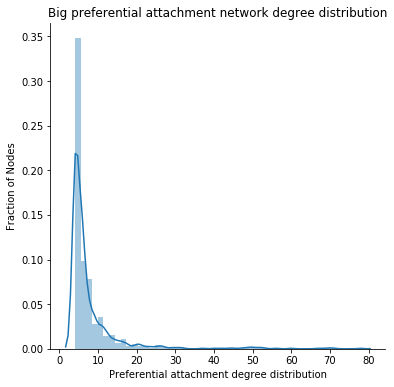

In [12]:
G_big_generated = nx.barabasi_albert_graph(1000, 4)

figure = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degrees = G_big_generated.degree()
sns.distplot(list(dict(degrees).values()));
plt.xlabel('Preferential attachment degree distribution')
plt.ylabel('Fraction of Nodes')
plt.title('Big preferential attachment network degree distribution')
plt.show();

In [13]:
nx.average_clustering(G_big_generated)

0.03259089240616716

In [14]:
nx.average_shortest_path_length(G_big_generated)

3.1913793793793794

We can see that degree distribution agrees with the one commonly observed in a real world networks! Average shortest path lenght is also similar. In contrast, average custering coefficient is much too small.

To investigate furhter, I will plot both shortest path length and clustering coefficient, depending on number of nodes and number of node a new node connects to.

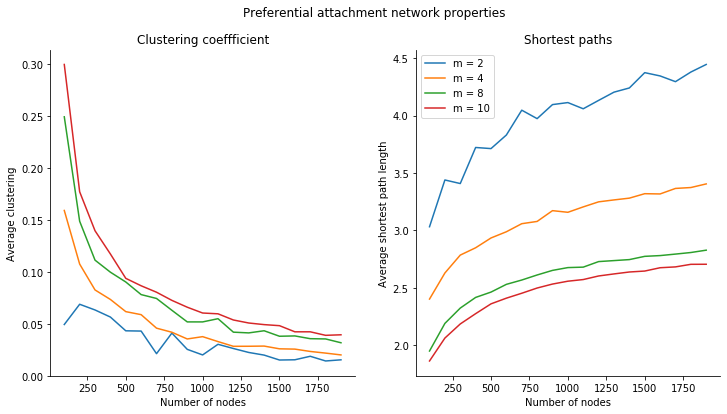

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

m_range = [2, 4, 8, 10]
n_range = range(100, 2000, 100)

for m in m_range:
    clust_values = np.zeros(shape=(len(n_range),))
    paths_values = np.zeros(shape=(len(n_range),))
    
    for idx, n in enumerate(n_range):
        G_big_generated = nx.barabasi_albert_graph(n, m)
        clust_values[idx] = nx.average_clustering(G_big_generated)
        paths_values[idx] = nx.average_shortest_path_length(G_big_generated)
    
    ax1.plot(n_range, clust_values, label=f'm = {m}')
    ax2.plot(n_range, paths_values, label=f'm = {m}')

    
plt.legend()
ax1.set_title('Clustering coeffficient')
ax1.set_xlabel('Number of nodes')
ax1.set_ylabel('Average clustering')

ax2.set_title('Shortest paths')
ax2.set_xlabel('Number of nodes')
ax2.set_ylabel('Average shortest path length')
plt.suptitle('Preferential attachment network properties')
plt.show();

We can see that average clustering coefficient decreases rapidly with the number of node. Shortest path length grows with the number of nodes, what intuitivly makes sense. It is also logical, that average shortest path lenght is smaller, if a number of nodes a new node connects to is bigger - the number of connections is bigger, it is easier to traverse through the graph.

# Small world networks

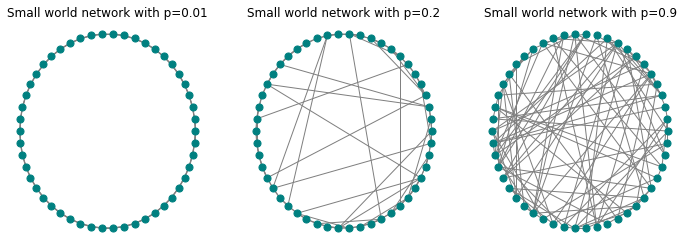

In [16]:
# Create three graphs with different rewiring probabilities
p1 = 0.01
p2 = 0.2
p3 = 0.9
G1 = nx.watts_strogatz_graph(50, 5, p1)
G2 = nx.watts_strogatz_graph(50, 5, p2)
G3 = nx.watts_strogatz_graph(50, 5, p3)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Draw first graph
plt.subplot(1, 3, 1)
pos = nx.circular_layout(G1)
nx.draw_networkx_nodes(G1, pos, width=2, node_color='teal', node_size=50)
nx.draw_networkx_edges(G1, pos, edge_color='grey')
plt.title(f'Small world network with p={p1}')
plt.axis('off');

# Draw second graph
plt.subplot(1, 3, 2)
pos = nx.circular_layout(G2)
nx.draw_networkx_nodes(G2, pos, width=2, node_color='teal', node_size=50)
nx.draw_networkx_edges(G2, pos, edge_color='grey')
plt.title(f'Small world network with p={p2}')
plt.axis('off');


# Draw third graph
plt.subplot(1, 3, 3)
pos = nx.circular_layout(G3)
nx.draw_networkx_nodes(G3, pos, width=2, node_color='teal', node_size=50)
nx.draw_networkx_edges(G3, pos, edge_color='grey')

plt.title(f'Small world network with p={p3}')
plt.axis('off');

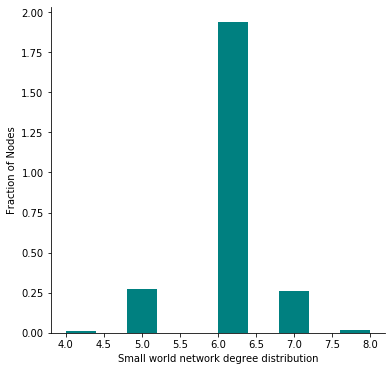

In [17]:
G = nx.watts_strogatz_graph(1000, 6, 0.04)

figure = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degrees = G.degree()
plt.hist(dict(degrees).values(), density=True, color='teal');
plt.xlabel('Small world network degree distribution')
plt.ylabel('Fraction of Nodes')
plt.show();

In [18]:
nx.average_clustering(G)

0.5238476190476248

In [19]:
nx.average_shortest_path_length(G)

8.124238238238238

# Link prediction

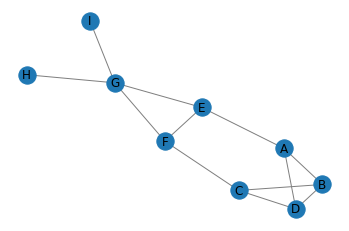

In [20]:
G = nx.Graph()
G.add_edge('A', 'B', label='actual')
G.add_edge('A', 'D', label='actual')
G.add_edge('B', 'D', label='actual')
G.add_edge('B', 'C', label='actual')
G.add_edge('C', 'D', label='actual')
G.add_edge('A', 'E', label='actual')
G.add_edge('C', 'F', label='actual')
G.add_edge('E', 'F', label='actual')
G.add_edge('E', 'G', label='actual')
G.add_edge('G', 'F', label='actual')
G.add_edge('G', 'H', label='actual')
G.add_edge('G', 'I', label='actual')

actual_edges = [(v, w) for v, w in G.edges if G.edges[v, w]['label'] == 'actual']
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, edge_color='grey')
plt.axis('off');

The simplest method to asses which nodes will become connected is to measure the number of common neighbours they have

In [21]:
def n_common_neighbours(G, u, v):
    """Find number of neighbours two nodes share."""
    n = len(list(nx.common_neighbors(G, u, v)))
    return u, v, n


df = pd.DataFrame(index=nx.non_edges(G))

# Iterate over all pairs of nodes that are not yet connected
df['common_neighbours'] = [n_common_neighbours(G, u, v) for u, v in nx.non_edges(G)]
df['common_neighbours'] = df['common_neighbours'].apply(lambda x: x[2])

# Sort pairs by the score
df.sort_values(by='common_neighbours', ascending=False)

,common_neighbours
"(C, A)",2
"(C, E)",1
"(A, F)",1
"(A, G)",1
"(I, F)",1
"(I, H)",1
"(E, I)",1
"(E, H)",1
"(C, G)",1
"(B, E)",1


In [22]:
# Add all potential, not yet formed edges
missing_edges = list(nx.non_edges(G))

for edge in missing_edges:
    G.add_edge(*edge, label='missing')

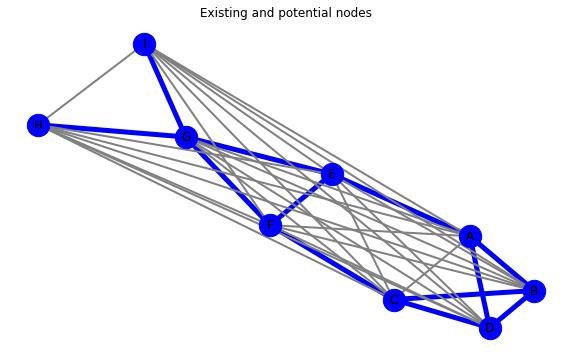

In [23]:
plt.figure(figsize=(10, 6))

# Draw actual graph
nx.draw_networkx(
    G,
    pos=pos,
    node_size=500,
    edgelist=actual_edges,
    node_color='blue',
    edge_color='blue',
    width=5)

# Draw potential edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=missing_edges,
    edge_color='grey',
    width=2)

plt.title('Existing and potential nodes')
plt.axis('off');

Jaccard coefficient

In [24]:
G_initial = G.edge_subgraph(actual_edges)

df['jaccard_coeff']  = [(u, v, score) for u, v, score in nx.jaccard_coefficient(G_initial)]
df['jaccard_coeff'] = df['jaccard_coeff'].apply(lambda x: round(x[2], 3))
df.sort_values(by='jaccard_coeff', ascending=False)

,common_neighbours,jaccard_coeff
"(I, H)",1,1.000
"(C, A)",2,0.500
"(E, H)",1,0.333
"(I, F)",1,0.333
"(E, I)",1,0.333
"(F, H)",1,0.333
"(D, E)",1,0.200
"(D, F)",1,0.200
"(A, F)",1,0.200
"(B, F)",1,0.200


Resource allocation - fraction of resource, that one node can send to the other node

In [25]:
df['resource_allocation']  = [(u, v, score) for u, v, score in nx.resource_allocation_index(G_initial)]
df['resource_allocation'] = df['resource_allocation'].apply(lambda x: round(x[2], 3))
df.sort_values(by='resource_allocation', ascending=False)

,common_neighbours,jaccard_coeff,resource_allocation
"(C, A)",2,0.500,0.667
"(D, F)",1,0.200,0.333
"(A, F)",1,0.200,0.333
"(A, G)",1,0.167,0.333
"(C, G)",1,0.167,0.333
"(C, E)",1,0.200,0.333
"(B, E)",1,0.200,0.333
"(B, F)",1,0.200,0.333
"(D, E)",1,0.200,0.333
"(E, H)",1,0.333,0.250


Adamic Adar index is a very similar measure to resource allocation index, with the difference, that instead of dividing by the degree of intermediate node, we devide by log of the degree

In [26]:
df['adamic_adar_index']  = [(u, v, score) for u, v, score in nx.adamic_adar_index(G_initial)]
df['adamic_adar_index'] = df['adamic_adar_index'].apply(lambda x: round(x[2], 3))
df.sort_values(by='adamic_adar_index', ascending=False)

,common_neighbours,jaccard_coeff,resource_allocation,adamic_adar_index
"(C, A)",2,0.500,0.667,1.820
"(D, F)",1,0.200,0.333,0.910
"(A, F)",1,0.200,0.333,0.910
"(A, G)",1,0.167,0.333,0.910
"(C, G)",1,0.167,0.333,0.910
"(C, E)",1,0.200,0.333,0.910
"(B, E)",1,0.200,0.333,0.910
"(B, F)",1,0.200,0.333,0.910
"(D, E)",1,0.200,0.333,0.910
"(E, H)",1,0.333,0.250,0.721


Preferential attachment scores is the product of two nodes' degree

In [27]:
df['preferential_attachment']  = [(u, v, score) for u, v, score in nx.preferential_attachment(G_initial)]
df['preferential_attachment'] = df['preferential_attachment'].apply(lambda x: round(x[2], 3))
df.sort_values(by='preferential_attachment', ascending=False)

,common_neighbours,jaccard_coeff,resource_allocation,adamic_adar_index,preferential_attachment
"(D, G)",0,0.000,0.000,0.000,12
"(B, G)",0,0.000,0.000,0.000,12
"(A, G)",1,0.167,0.333,0.910,12
"(C, G)",1,0.167,0.333,0.910,12
"(B, E)",1,0.200,0.333,0.910,9
"(A, F)",1,0.200,0.333,0.910,9
"(C, E)",1,0.200,0.333,0.910,9
"(C, A)",2,0.500,0.667,1.820,9
"(D, F)",1,0.200,0.333,0.910,9
"(D, E)",1,0.200,0.333,0.910,9


In [28]:
G_new = nx.Graph()
G_new.add_edges_from(df.index)

In [29]:
for i, (v, w) in enumerate(df.index):
    G_new.edges()[v, w]['weight'] = df.iloc[i]['preferential_attachment']

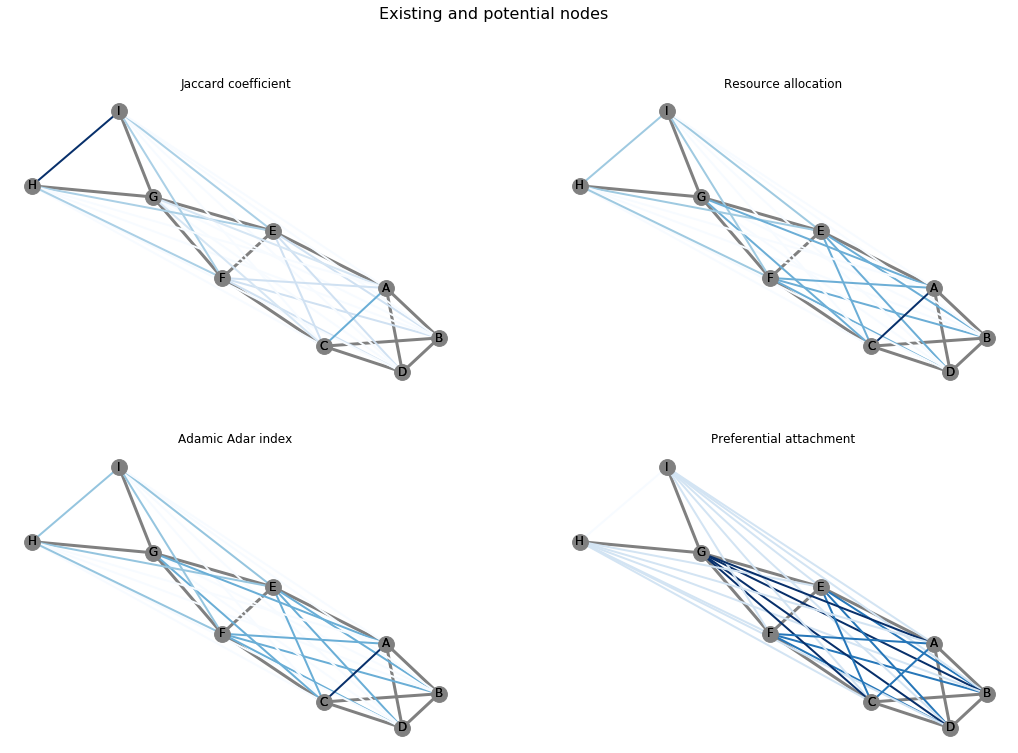

In [30]:
def draw_potential_edges(G, G_new, df, column_name, axis):
    # Draw actual graph
    nx.draw_networkx(
        G,
        pos=pos,
        node_size=250,
        edgelist=actual_edges,
        node_color='grey',
        edge_color='grey',
        width=3)
    
    # Draw potential edges
    nx.draw_networkx(
        G_new,
        pos=pos,
        node_size=0,
        edgelist=list(df.index),
        edge_color=df[column_name] / np.max(df[column_name]),
        edge_cmap=plt.cm.Blues,
        width=2)


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
plt.subplot(2, 2, 1)
draw_potential_edges(G, G_new, df, 'jaccard_coeff', axs[0, 0])
plt.title('Jaccard coefficient')
plt.axis('off');

plt.subplot(2, 2, 2)
draw_potential_edges(G, G_new, df, 'resource_allocation', axs[0, 1])
plt.title('Resource allocation')
plt.axis('off');

plt.subplot(2, 2, 3)
draw_potential_edges(G, G_new, df, 'adamic_adar_index', axs[1, 0])
plt.title('Adamic Adar index')
plt.axis('off');

plt.subplot(2, 2, 4)
draw_potential_edges(G, G_new, df, 'preferential_attachment', axs[1, 1])
plt.title('Preferential attachment')
plt.axis('off');

plt.suptitle('Existing and potential nodes', fontsize=16);

# Community structure - aware link prediction

Following two measures not only take into account the degree of the nodes, but also a community structure of the network. Pairs of nodes who belong to the same community and have many common neighbours in the same community are likely to form an edge.

The first one is called common neighbour Soundarajan-Hopcroft score. 

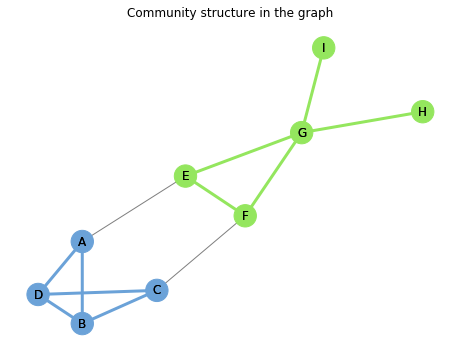

In [31]:
G = G_initial
G.nodes['A']['community'] = 1
G.nodes['B']['community'] = 1
G.nodes['C']['community'] = 1
G.nodes['D']['community'] = 1
G.nodes['E']['community'] = 2
G.nodes['F']['community'] = 2
G.nodes['G']['community'] = 2
G.nodes['H']['community'] = 2
G.nodes['I']['community'] = 2

def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)


def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0


# Set edge communities
set_edge_community(G)
colors = [get_color(G.nodes[n]['community']) for n in G.nodes()]
pos = nx.spring_layout(G)

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

plt.figure(figsize=(8, 6))

# Draw external edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color='grey')
# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=500,
    node_color=colors,
    edgelist=internal,
    edge_color=internal_color,
    width=3)

plt.title('Community structure in the graph')
plt.axis('off');

In [32]:
df = pd.DataFrame(index=nx.non_edges(G_initial))
df['cn_soundarajan_hopcroft']  = [(u, v, score) for u, v, score in nx.cn_soundarajan_hopcroft(G_initial)]
df['cn_soundarajan_hopcroft'] = df['cn_soundarajan_hopcroft'].apply(lambda x: round(x[2], 3))
df.sort_values(by='cn_soundarajan_hopcroft', ascending=False)

,cn_soundarajan_hopcroft
"(C, A)",4
"(E, H)",2
"(I, F)",2
"(I, H)",2
"(E, I)",2
"(F, H)",2
"(D, E)",1
"(C, G)",1
"(A, F)",1
"(A, G)",1


The second is similar to resource allocation index, taking into account community structure

In [33]:
df['ra_soundarajan_hopcroft']  = [(u, v, score) for u, v, score in nx.ra_index_soundarajan_hopcroft(G_initial)]
df['ra_soundarajan_hopcroft'] = df['ra_soundarajan_hopcroft'].apply(lambda x: round(x[2], 3))
df.sort_values(by='ra_soundarajan_hopcroft', ascending=False)

,cn_soundarajan_hopcroft,ra_soundarajan_hopcroft
"(C, A)",4,0.667
"(E, H)",2,0.250
"(I, F)",2,0.250
"(I, H)",2,0.250
"(E, I)",2,0.250
"(F, H)",2,0.250
"(D, I)",0,0.000
"(D, F)",1,0.000
"(A, F)",1,0.000
"(A, H)",0,0.000


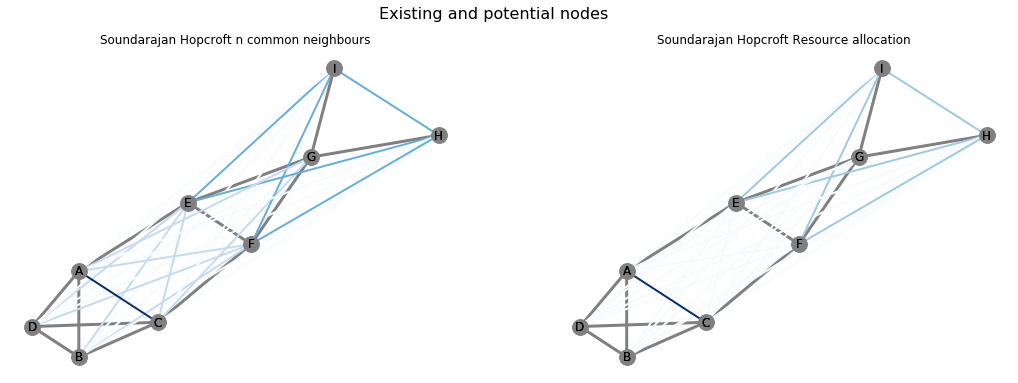

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
plt.subplot(1, 2, 1)
draw_potential_edges(G, G_new, df, 'cn_soundarajan_hopcroft', axs[0])
plt.title('Soundarajan Hopcroft n common neighbours')
plt.axis('off');

plt.subplot(1, 2, 2)
draw_potential_edges(G, G_new, df, 'ra_soundarajan_hopcroft', axs[1])
plt.title('Soundarajan Hopcroft Resource allocation')
plt.axis('off');

plt.suptitle('Existing and potential nodes', fontsize=16);